In [1]:
from Grover_key_finder import *

from qiskit_aer import AerSimulator
from qiskit_aer.primitives import Sampler as AerSampler

import numpy as np
from matplotlib import pyplot as plt

from PyECCArithmetic import *
from qiskit.visualization import plot_histogram

# Elliptic Curve Key Theft
We choose the elliptic curve with $a = 0, b = 7, p = 13$. The valid points on this curve are:
$(7,5)(7,8),(8,5),(8,8),(11,5),(11,8)$ and all these points have order 7.

In [2]:
# choose generator
# all the points have the same order, so I'll choose G = (8,8) because it's nice
G = (8,8)

# example public key
# Q = (8,5)
Q = (11,5)

curve = Curve(0, 7, 13)

circuit = generate_key_finder_circuit(Q, curve, G, iterations=2)

Correct d: 5
Correct d: 5


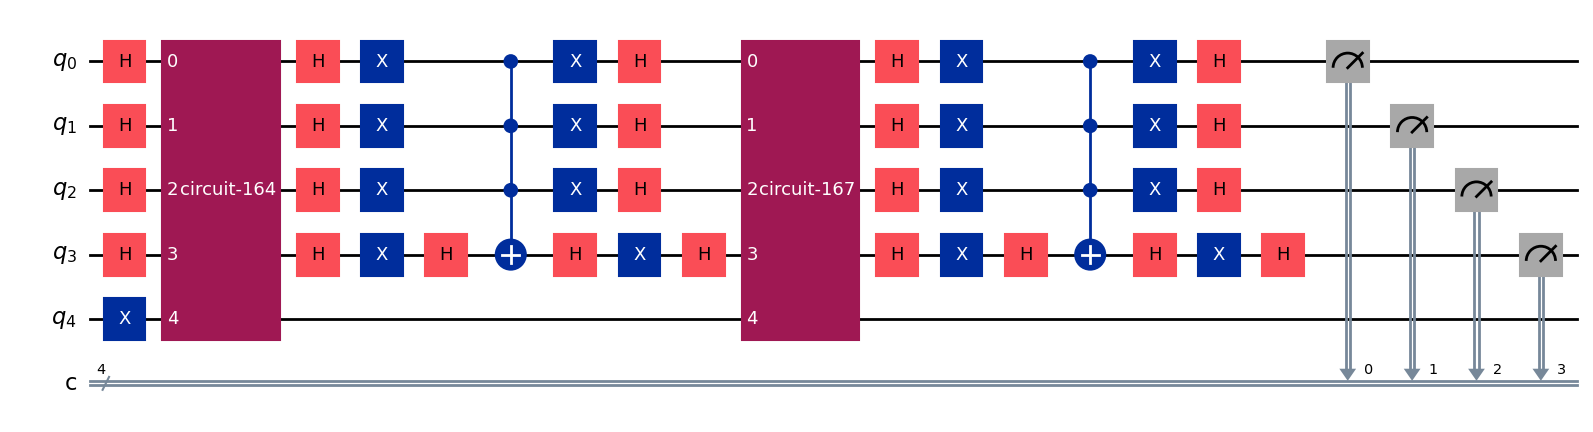

In [3]:
circuit.draw('mpl')

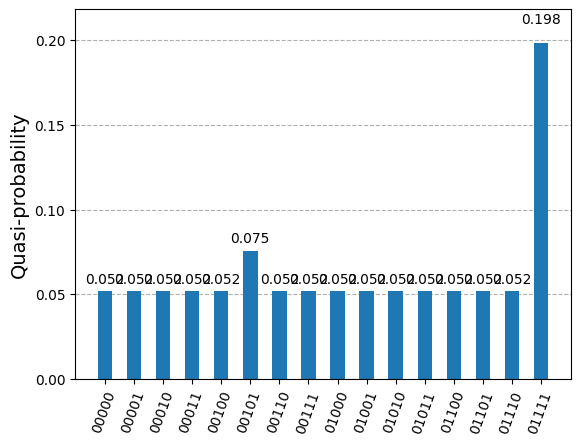

In [4]:
sampler=AerSampler()
job_sim = sampler.run([circuit] , shots=None)
quasi_dists = job_sim.result().quasi_dists[0].binary_probabilities()
plot_histogram(quasi_dists)

Indeed, we have that $0101_2 = 5$ is the correct answer: $5\times G = Q$. We can check this:

In [ ]:
G_point = Point(*G, curve=curve)
print(f"Indeed, 5 * G = ({(5*G_point).x}, {(5*G_point).y})")

Indeed, $5\times G$ = (11, 5)
